# PROBLEM SET #4

## Problem 1

### (a)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def drunkwalk(N):
    x = 0
    y = 0
    for i in range(N):
        dice = np.random.rand()
        if dice <= 1/6:
            x = x + 1
        elif dice <= 1/3 + 1/6:
            x = x - 1
        elif dice <= 1/4 + 1/3 + 1/6:
            y = y + 1
        elif dice <= 1/4 + 1/4 + 1/3 + 1/6:
            y = y - 1
    return x, y

times = 100000
a = np.zeros(times)
b = np.zeros(times)
distance = np.zeros(times)
count = 0 
probability = 0

for i in range(times):
    a[i], b[i] = drunkwalk(50)
    distance[i] = (a[i]**2 + b[i]**2)**0.5
    if distance[i] > 20:
        count = count + 1

probability = count/times
    

print("probability that after 50 steps, he will be more than 20 units distant from the origin is {}".format(probability))
print("mean value of distance is {:.3f}".format(np.mean(distance)))
print("standard deviation of distance is {:.3f}".format(np.std(distance)))


probability that after 50 steps, he will be more than 20 units distant from the origin is 0.0125
mean value of distance is 9.998
standard deviation of distance is 4.276


### (b)

In [19]:
from scipy import stats

times = 2000000
a = np.zeros(times)
b = np.zeros(times)
steps = 1000
distance = np.zeros(times)
position = [0 for x in range(times)] 
count = 0 
probability = 0

for i in range(times):
    a[i], b[i] = drunkwalk(steps)
    distance[i] = (a[i]**2 + b[i]**2)**0.5
    position[i] = (a[i], b[i])
    if i%10000 == 0:
        print('loading {}%'.format(100*i/times))
    

mode_distance = stats.mode(distance)
mode_position = stats.mode(position)
print("the most probable position of the drunkard after 1000 steps is {}".format(mode_position[0]))
print("the most probable deviation of the drunkard after 1000 steps is {}".format(mode_distance[0]))

loading 0.0%
loading 0.5%
loading 1.0%
loading 1.5%
loading 2.0%
loading 2.5%
loading 3.0%
loading 3.5%
loading 4.0%
loading 4.5%
loading 5.0%
loading 5.5%
loading 6.0%
loading 6.5%
loading 7.0%
loading 7.5%
loading 8.0%
loading 8.5%
loading 9.0%
loading 9.5%
loading 10.0%
loading 10.5%
loading 11.0%
loading 11.5%
loading 12.0%
loading 12.5%
loading 13.0%
loading 13.5%
loading 14.0%
loading 14.5%
loading 15.0%
loading 15.5%
loading 16.0%
loading 16.5%
loading 17.0%
loading 17.5%
loading 18.0%
loading 18.5%
loading 19.0%
loading 19.5%
loading 20.0%
loading 20.5%
loading 21.0%
loading 21.5%
loading 22.0%
loading 22.5%
loading 23.0%
loading 23.5%
loading 24.0%
loading 24.5%
loading 25.0%
loading 25.5%
loading 26.0%
loading 26.5%
loading 27.0%
loading 27.5%
loading 28.0%
loading 28.5%
loading 29.0%
loading 29.5%
loading 30.0%
loading 30.5%
loading 31.0%
loading 31.5%
loading 32.0%
loading 32.5%
loading 33.0%
loading 33.5%
loading 34.0%
loading 34.5%
loading 35.0%
loading 35.5%
loading 36.0

위 결과와 같은 계산값의 경우 random하게 계산된 확률에 의해 실제로 가상의 취객을 규칙에 따라 움직이면서 가장 probable한(가능성 있는) position과 deviation을 계산한 값이기 떄문에 seed에 따라(매번 계산할 때마다) 결과값이 달라질 수 있다. 

## Problem 2 

In [79]:
import random
import collections


def cal(n):
    numbers = n
    k = np.zeros(numbers)
    for i in range(numbers):
        k[i] = random.randrange(365)
    duplicates = [item for item, count in collections.Counter(k).items() if count > 1]
    if np.size(duplicates) == 0:
        return 0 # 생일 겹치는 사람 없음
    else:
        return 1 # 생일 겹치는 사람 있음

def find_prob(numbers, times):
    count = 0
    for i in range(times):
        if cal(numbers) == 1:
            count = count + 1
    probability = count/times
    return probability

times = 10**4

print("the probability that at least two of the {} people have the same birthday is {}".format(10, find_prob(10, times)))
print("the probability that at least two of the {} people have the same birthday is {}".format(30, find_prob(30, times)))
print("the probability that at least two of the {} people have the same birthday is {}".format(50, find_prob(50, times)))

t = 0
for i in range(21, 25):
    if find_prob(i, 10**5) > 0.5:
        t = i
        break
        
print("the smallest n for the probability to be grater than fifty-fifty is {}".format(t))
print("the probability that at least two of the {} people have the same birthday is {}".format(22, find_prob(22, times)))
print("the probability that at least two of the {} people have the same birthday is {}".format(23, find_prob(23, times)))


the probability that at least two of the 10 people have the same birthday is 0.1194
the probability that at least two of the 30 people have the same birthday is 0.7036
the probability that at least two of the 50 people have the same birthday is 0.9691
the smallest n for the probability to be grater than fifty-fifty is 23
the probability that at least two of the 22 people have the same birthday is 0.476
the probability that at least two of the 23 people have the same birthday is 0.5138


## Problem 3

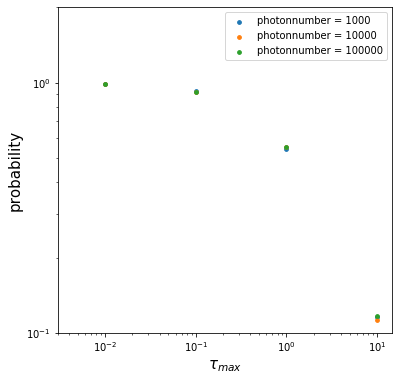

In [73]:
def transmission_probability(photonnumber, tau_max):
    z_max = 1
    count_trans = 0
    N = 0
    
    while N <= photonnumber:
        epsilon1 = np.random.rand()
        epsilon2 = np.random.rand()
        mu =np.sqrt(epsilon1)
        theta = np.arccos(mu) 
        phi = np.pi*2*epsilon2        
        
        initial_position = np.zeros(3)
        # Step 1
        initial_direction_vector = np.array([np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi), np.cos(theta)])
        position = initial_position
        direction_vector = initial_direction_vector

        while True:   # 입자가 slab 안에 있는 동안
                epsilon3 = np.random.rand()
                epsilon4 = np.random.rand()
                epsilon5 = np.random.rand()
                # step2
                tau = -np.log(epsilon3)
                interaction_probability = 1 - np.exp(tau)
              
                # step3
                L = tau*z_max/tau_max
                position = position + L*(direction_vector)
                if position[2] < 0: # Step 4
                    break # skip to step 7
                    
                if position[2] > z_max:
                    count_trans = count_trans + 1
                    break
                                      
                # step 5
                phi2 = np.pi*2*epsilon4
                mu2 = 2*epsilon5 - 1
                theta2 = np.arccos(mu2)
                direction_vector = np.array([np.sin(theta2)*np.cos(phi2), np.sin(theta2)*np.sin(phi2), np.cos(theta2)])
        N = N + 1
        
    return count_trans/photonnumber 

tau_max= [0.01, 0.1, 1, 10]
numberlist = [10**3, 10**4,  10**5]
data1 = np.zeros(4)
data2 = np.zeros(4)
data3 = np.zeros(4)

for i in range(np.size(tau_max)):
    data1[i] = transmission_probability(numberlist[0], tau_max[i])
for i in range(np.size(tau_max)):
    data2[i] = transmission_probability(numberlist[1], tau_max[i])
for i in range(np.size(tau_max)):
    data3[i] = transmission_probability(numberlist[2], tau_max[i])
    
plt.figure(figsize=(6,6))

plt.scatter(tau_max, data1, s=14, label = 'photonnumber = {}'.format(numberlist[0]))
plt.scatter(tau_max, data2, s=14, label = 'photonnumber = {}'.format(numberlist[1]))
plt.scatter(tau_max, data3, s=14, label = 'photonnumber = {}'.format(numberlist[2]))

plt.ylabel('transmitted probability', size = 15)
plt.xlabel(r'$\tau_{max}$', size = 15)
plt.yscale('log')
plt.xscale('log')
plt.ylim(2*10**0, 10**-2)
plt.legend()



In [230]:
df = pd.DataFrame(data1, columns = ['photonnumber = $10^{3}$'],\
                  index = ['$\tau_{max}$=0.01', '$\tau_{max}$ = 0.1','$\tau_{max}$= 1',\
                           '$\tau_{max}$ = 10'])

df['photonnumber = $10^4$'] = data2
df['photonnumber = $10^5$'] = data3
df

,photonnumber = $10^{3}$,photonnumber = $10^4$,photonnumber = $10^5$
$\tau_{max}$=0.01,0.991,0.9912,0.99020
$\tau_{max}$ = 0.1,0.925,0.9150,0.91547
$\tau_{max}$= 1,0.545,0.5554,0.55138
$\tau_{max}$ = 10,0.116,0.1130,0.11720


photon의 수가 10000에서 100000으로 즏가해도 확률 변화 값이 거의 없다. 즉, 이를 통해서 현재 결과값 transmitted probability가 수렴된 것을 알 수 있다. 
$\tau_{max}$가 작을 때는 photon이 겪는 충돌의 횟수가 적어 대부분이 transmitted 되지만 $\tau_{max}$가 커질 수록 photon은 충돌을 자주 일으키고 transmitted 될 확률이 감소하는 것을 확인할 수 있다. 

### (b)

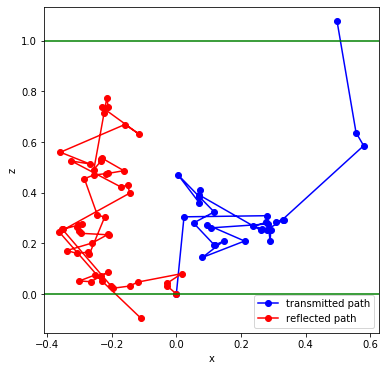

In [42]:
def photonpath(tau_max):
    z_max = 1
    epsilon1 = np.random.rand()
    epsilon2 = np.random.rand()
    mu =np.sqrt(epsilon1)
    theta = np.arccos(mu) 
    phi = np.pi*2*epsilon2        
    initial_position = np.zeros(3)
    initial_direction_vector = np.array([np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi), np.cos(theta)])
    position = initial_position
    direction_vector = initial_direction_vector    

    position_x = []
    position_z = []
    
    while position[2] <= z_max: # slab 내에 photon이 있는 동안
        position_x.append(position[0])
        position_z.append(position[2])
        epsilon3 = np.random.rand()
        epsilon4 = np.random.rand()
        epsilon5 = np.random.rand()
        tau = -np.log(epsilon3)
        interaction_probability = 1 - np.exp(tau)
        L = tau*z_max/tau_max
        position = position + L*(direction_vector)
        if position[2] < 0:
            break # skip to step 7
        if position[2] > z_max:
            break

        phi2 = np.pi*2*epsilon4
        mu2 = 2*epsilon5 - 1
        theta2 = np.arccos(mu2)            
        direction_vector = np.array([np.sin(theta2)*np.cos(phi2), np.sin(theta2)*np.sin(phi2), np.cos(theta2)])

    position_x.append(position[0])
    position_z.append(position[2])  
    return position_x, position_z

plt.figure(figsize=(6, 6))

transmitted_z_final = -10
while transmitted_z_final<1:
    transmitted_path_x, transmitted_path_z = photonpath(10)
    transmitted_path_x = np.array(transmitted_path_x)
    transmitted_path_z = np.array(transmitted_path_z)
    transmitted_z_final = transmitted_path_z[-1]
    
plt.plot(transmitted_path_x, transmitted_path_z,  marker = 'o', color = 'blue', label = 'transmitted path')

reflected_z_final = 10
while reflected_z_final>0:
    reflected_path_x, reflected_path_z = photonpath(10)
    reflected_path_x = np.array(reflected_path_x)
    reflected_path_z = np.array(reflected_path_z)
    reflected_z_final = reflected_path_z[-1]


plt.plot(reflected_path_x, reflected_path_z,  marker = 'o', color = 'red', label = 'reflected path')



plt.axhline(0, color = 'green')
plt.axhline(1, color = 'green')

plt.xlabel('x')
plt.ylabel('z')
plt.legend()


### (c)

0
1
2
3
4
5
6
7
8
9


'\nfor i in range(10):\n    print(i)\n    probability = transmit_probabilty_direction(thetaarray2[i],thetaarray2[i+1])\n    middle = 0.5*(thetaarray2[i] + thetaarray2[i+1])    \n    plt.scatter(middle, probability)\n'

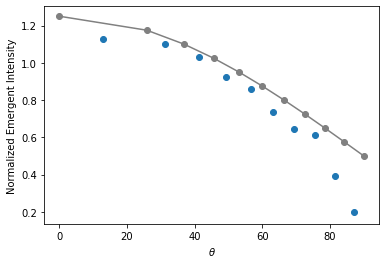

In [263]:
def Intensity_function(theta):
    a = 2+3*np.cos(np.radians(theta))
    b = 5
    return 1.25*(a/b)

def transmitdirection(tau_max):
    j=0
    while j==0:
        z_max = 1
        epsilon1 = np.random.rand()
        epsilon2 = np.random.rand()
        mu =np.sqrt(epsilon1)
        theta = np.arccos(mu) 
        phi = np.pi*2*epsilon2        
        initial_position = np.zeros(3)
        initial_direction_vector = np.array([np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi), np.cos(theta)])
        position = initial_position
        direction_vector = initial_direction_vector    

        position_x = []
        position_z = []

        
        N = 0
        
        while position[2] <= z_max: # slab 내에 photon이 있는 동안
            N = N + 1
            position_x.append(position[0])
            position_z.append(position[2])
            epsilon3 = np.random.rand()
            epsilon4 = np.random.rand()
            epsilon5 = np.random.rand()
            tau = -np.log(epsilon3)
            interaction_probability = 1 - np.exp(tau)
            L = tau*z_max/tau_max
            position = position + L*(direction_vector)

            if position[2] < 0:
                j = 0
                break # skip to step 7
                
            if position[2] > z_max:
                if N == 1:
                    return np.degrees(theta)
                else:
                    j=1
                    break


            phi2 = np.pi*2*epsilon4
            mu2 = 2*epsilon5 - 1
            theta2 = np.arccos(mu2)            
            direction_vector = np.array([np.sin(theta2)*np.cos(phi2), np.sin(theta2)*np.sin(phi2), np.cos(theta2)])

    return np.degrees(theta2)

def transmit_probabilty_direction(a, b):
    tau_max = 10
    times = 10000
    count = 0
    for i in range(times):
        if a<=transmitdirection(tau_max)<=b:
            count = count + 1    
    probability = count/times
    
    return probability
            
def Intensity_calculation(num, a):
    thetaarray2 = a
    mu = np.cos(np.radians(thetaarray2[num]))
    energy = transmit_probabilty_direction(thetaarray2[num], thetaarray2[num+1])
    mother = 2 * mu * 0.1
    result = energy/mother
    middle = 0.5*(thetaarray2[num] + thetaarray2[num+1])
    return middle, result


bins = np.arange(0, 1+0.1, 0.1)
tau_max = 10
thetaarray = np.zeros(np.size(bins))
for i in range(np.size(bins)):
    thetaarray[i] = np.degrees(np.arccos(bins[i]))

thetaarray2 = np.zeros(np.size(bins))
for i in range(np.size(bins)):
    thetaarray2[i] = thetaarray[np.size(bins)-1-i]
    


plt.plot(thetaarray, Intensity_function(thetaarray), marker = 'o', label = 'prediction', color = 'gray')
plt.xlabel(r'$\theta$')
plt.ylabel('Normalized Emergent Intensity')

xdot = np.zeros(10)
ydot = np.zeros(10)
for i in range(10):
    print(i)
    xdot[i], ydot[i] = Intensity_calculation(i, thetaarray2)
plt.scatter(xdot, ydot, label = '(c)')



In [269]:
def Intensity_function2(theta):
    a = 2+3*np.cos(np.radians(theta))
    b = 5
    return (a/b)

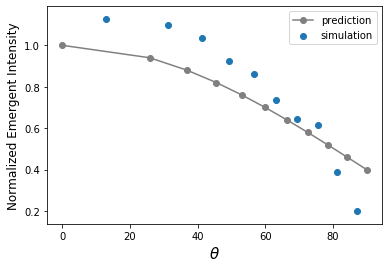

In [273]:
plt.scatter(xdot, ydot, label = 'simulation')
plt.plot(thetaarray, Intensity_function2(thetaarray), marker = 'o', label = 'prediction', color = 'gray')
plt.xlabel(r'$\theta$', size = 15)
plt.ylabel('Normalized Emergent Intensity', size = 12)
plt.legend()

given normalized emergent intensity에 대한 식 $I_{i} =\frac{E_{i}}{2\mu_{i}\Delta\mu}$ 을 이용하여 prediction을 계산할 수 있다. 위 그래프는 문제에서 주어진 prediction에 대한 식 $I_{\theta}=\frac{2+3\cos{\theta}}{5}$를 plot한 것과 비교하여 나타낸 그래프이다. 

그리고 MonteCarlo 수업자료 내 Binning Photons 슬라이드 에서는 Intensity is proportial to $I_{i} =\frac{E_{i}}{2\mu_{i}\Delta\mu}$ 라고 제시하였으므로, prediction의 값에 일정 상수를 곱해서 simulation한 결과와 비교해볼 수도 있다.  

(0, 1.3)

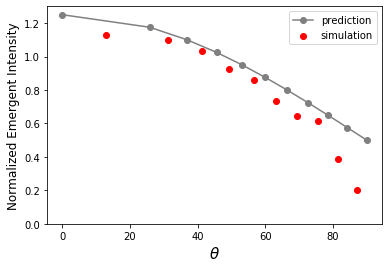

In [274]:
plt.scatter(xdot, ydot, label = 'simulation', color = 'red')
plt.plot(thetaarray, Intensity_function(thetaarray), marker = 'o', label = 'prediction', color = 'gray')
plt.xlabel(r'$\theta$', size = 15)
plt.ylabel('Normalized Emergent Intensity', size = 12)
plt.legend()
plt.ylim(0, 1.3)

prediction 과 simulation을 통해 계산한 intensity 모두 $\theta$의 값이 커질 수록 감소하는 경향을 갖는 것을 확인할 수 있었고 두 경우의 값은 거의 비슷하였다.  다만 문제에서 주어진 공식을 통해서 구한 prediction 보다 직접  $I_{i} =\frac{E_{i}}{2\mu_{i}\Delta\mu}$ 을 통해 계산한 intensity의 값이 $\theta$ 값이 클 때 더 작은 것을 확인할 수 있었다. 

## Problem 4

### (a)

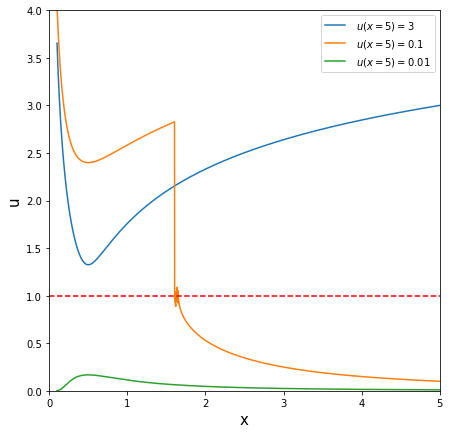

In [3]:
def RK4(func,x,y,h): 
    hh=0.5*h 
    V1=func(x,y) 
    V2=func(x+hh,y+hh*V1)
    V3=func(x+hh,y-hh*V2) 
    V4=func(x+h,y+h*V3)
    return y+h*(V1+2. *V2+2. *V3+V4) /6.

def dudx(x,u): 
    return (2/x -1/x**2)/(u-1/u)

def BondiIntegrate(x_start,x_stop,u_initial,N):
    dx=np.abs(x_start-x_stop)/N 
    u_result=np.array([u_initial]) 
    
    if x_start>x_stop: # 적분 방향이 -인 경우
        i=N 
        for i in range(N, 0, -1): 
            x_width=np. linspace(x_stop,x_start,N+1) 
            u_ans=RK4(dudx, x_width[i], u_result[0], -dx) 
            u_result=np.append(u_ans,u_result)
            
    elif x_start<x_stop: # 적분 방향이 +인 경우 
        i=0 
        for i in range(N): 
            x_width=np. linspace(x_start,x_stop,N+1)
            u_ans=RK4(dudx,x_width[i],u_result[-1] ,dx)
            u_result=np.append(u_result,u_ans) 
            
    return x_width,u_result #x와 u를 동시에 출력



x_1,u_1=BondiIntegrate(5, 0.1, 3, 10000) 
x_2,u_2=BondiIntegrate(5, 0.1, 0.1, 10000) 
x_3,u_3=BondiIntegrate(5, 0.1, 0.01, 10000)
plt.figure(figsize=(7, 7))
plt.plot(x_1, u_1,label=r' $u(x=5)=3$' ) 
plt.plot(x_2, u_2,label=r' $u(x=5)=0.1$') 
plt.plot(x_3, u_3,label=r' $u(x=5)=0.01$') 
plt.axhline(1.0 ,color = 'red', ls = '--') 
plt.xlim(0.0, 5.0)
plt.ylim(0.0, 4.0)
plt.xlabel('x', size = 15 ) 
plt.ylabel('u', size = 15 )
plt.legend()

u(5) = 0.1 일 때, u = 1 인 지점을 계산하게 된다. 이 때
$\frac{du}{dx}$ = $\frac{ \frac{2}{x}-\frac{1}{x^{2}}}{u-\frac{1}{u}}$ 인데 <br> u = 1일 때 분모의 계산값이 0이 되므로 문제가 발생하게 된다. <br>
이 때 $\frac{dx}{du}$ = $\frac   {u-\frac{1}{u}} {\frac{2}{x}-\frac{1}{x^{2}}}   $ 는 x = 0, 1/2이 아니라면 분모가 0이 되지 않고 u의 값에 전혀 구애 받지 않으므로 이를 이용하여 ODE를 풀이할 수 있다. 

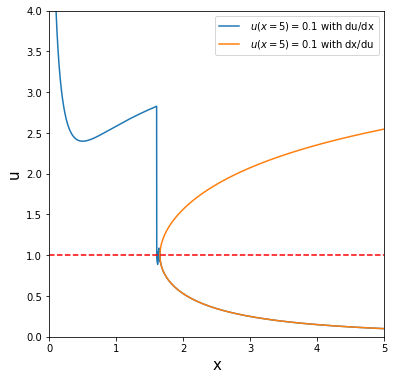

In [4]:
def RK4(func,x,y,h): 
    hh=0.5*h 
    V1=func(x,y) 
    V2=func(x+hh,y+hh*V1)
    V3=func(x+hh,y-hh*V2) 
    V4=func(x+h,y+h*V3)
    return y+h*(V1+2. *V2+2. *V3+V4) /6.

def dxdu(u,x): 
    return (u-1/u)/(2/x -1/x**2)

def BondiIntegrate2(u_start,u_stop,x_initial,N):
    du=np.abs(u_start-u_stop)/N 
    x_result=np.array([x_initial]) 
    
    if u_start>u_stop: # 적분 방향이 -인 경우
        i=N 
        for i in range(N, 0, -1): 
            u_width=np.linspace(u_stop,u_start,N+1) 
            x_ans=RK4(dxdu, u_width[i], x_result[0], -du) 
            x_result=np.append(x_ans,x_result)
            
    elif u_start<u_stop: # 적분 방향이 +인 경우 
        i=0 
        for i in range(N): 
            u_width=np.linspace(u_start,u_stop,N+1)
            x_ans=RK4(dxdu,u_width[i],x_result[-1] ,du)
            x_result=np.append(x_result,x_ans) 
            
    return x_result, u_width 


x_2sub, u_2sub=BondiIntegrate2(0.1, 4, 5, 10000) 
plt.figure(figsize=(6, 6))
plt.plot(x_2, u_2,label=r' $u(x=5)=0.1$ with du/dx') 
plt.plot(x_2sub,u_2sub,label=r' $u(x=5)=0.1$ with dx/du') 
plt.axhline(1.0 ,color = 'red', ls = '--') 
plt.xlim(0.0, 5.0)
plt.ylim(0.0, 4.0)
plt.xlabel('x', size = 15 ) 
plt.ylabel('u', size = 15 )
plt.legend()

dx/du로 풀이한 해애서 x=0, 1/2를 지나지 않으므로 해에 문제가 없음을 알 수 있다. 

### (b)

$\frac{du}{dx}$ = $\frac{ \frac{2}{x}-\frac{1}{x^{2}}}{u-\frac{1}{u}}$ 이므로 x=1/2, u=1인 근방에서
$$
u = 1 + \Delta u, \ x = 1/2 + \Delta x \\
(u - \frac{1}{u}) du = (\frac{2}{x} - \frac{1}{x^2}) dx \\
((1 + \Delta u) - (1 + \Delta u)^{-1}) \Delta u = (2(\frac{1}{2} + \Delta x)^{-1} - (\frac{1}{2} + \Delta x)^{-2}) \Delta x \\
((1 + \Delta u) - (1 - \Delta u)) \Delta u = (\frac{4}{1 + 2\Delta x} - \frac{4}{(1 + 2\Delta x)^{2}})\Delta x = 8(\Delta x^2) (1 + 2\Delta x)^{-2} \\
2(\Delta u)^2 = 8(\Delta x)^2 (1 - 4 \Delta x) \approx 8(\Delta x)^2 \\
\therefore \Delta u = \pm 2\Delta x
$$

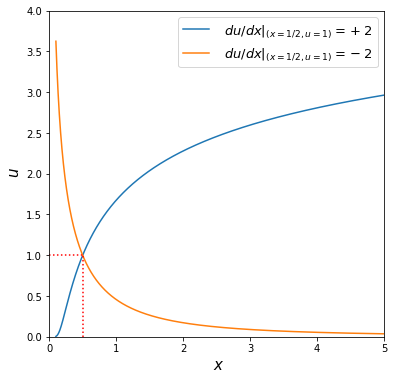

In [5]:
def RK4(func,x,y,h): 
    hh=0.5*h 
    V1=func(x,y) 
    V2=func(x+hh,y+hh*V1)
    V3=func(x+hh,y-hh*V2) 
    V4=func(x+h,y+h*V3)
    return y+h*(V1+2. *V2+2. *V3+V4) /6.

def dudx(x,u): 
    return (2/x -1/x**2)/(u-1/u)

def Bonditransonic(x_start, x_stop, u_initial, N, sign):
    dx=np.abs(x_start-x_stop)/N 
    u_result=np.array([u_initial]) 
    
    if x_start>x_stop:
        i=N 
        for i in range(N, 0, -1): 
            x_width=np.linspace(x_stop,x_start,N+1)             
            if x_width[i] == 0.5 and u_result[0] == 1:
                if sign == '+':
                    u_ans = u_result[0] - 2*dx # du = 2dx
                elif sign == '-':
                    u_ans = u_result[0] + 2*dx
            else:
                u_ans=RK4(dudx, x_width[i], u_result[0], -dx)               
            u_result=np.append(u_ans,u_result)
            
    elif x_start<x_stop: 
        i=0 
        for i in range(N): 
            x_width=np.linspace(x_start,x_stop,N+1) 
            if x_width[i] == 0.5 and u_result[-1] == 1:
                if sign == '+':
                    u_ans = u_result[0] + 2*dx # du = 2dx
                elif sign == '-':
                    u_ans = u_result[0] - 2*dx
            else:
                u_ans=RK4(dudx, x_width[i], u_result[-1], dx)               
            u_result=np.append(u_result, u_ans)
           
    return x_width,u_result

# du/dx = 2
x_1, transonic_1 = Bonditransonic(0.5, 0.1, 1, 10000, '+')
x_2, transonic_2 = Bonditransonic(0.5, 5, 1, 10000, '+')
x_data_plus2 = np.append(x_1, x_2)
transonic_plus2 = np.append(transonic_1, transonic_2)


# du/dx = -2
x_3, transonic_3 = Bonditransonic(0.5, 0.1, 1, 10000, '-')
x_4, transonic_4 = Bonditransonic(0.5, 5, 1, 10000, '-')
x_data_minus2 = np.append(x_3, x_4)
transonic_minus2 = np.append(transonic_3, transonic_4)




plt.figure(figsize=(6, 6)) 
plt.plot(x_data_plus2, transonic_plus2,label=r' $du/dx|_{(x=1/2 ,u=1)}=+2$' ) 
plt.plot(x_data_minus2, transonic_minus2,label=r' $du/dx|_{(x=1/2 ,u=1)}=-2$' )
plt.axhline(1.0, xmax=(1/2)/5, color = 'red', ls = ':')
plt.axvline(0.5, ymax=1/4, color = 'red', ls = ':') 
plt.xlim(0.0, 5.0)
plt.ylim(0.0, 4.0) 
plt.xlabel(r' $x$' ,fontsize=15) 
plt.ylabel(r' $u$' ,fontsize=15)
plt.legend(fontsize=13) 